## Classification KNN TRAIN CITYBLOCK

### Libraries

In [1]:
# !pip install scikit-plot
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import os
os.environ["OMP_NUM_THREADS"] = "8"

In [2]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)

from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall

### Data preprocessing

In [3]:
df = pd.read_csv("train_cleaned.csv")
#test = pd.read_csv("test_cleaned.csv")

In [4]:
df = df.replace({"explicit": {False:0, True:1}})
#test = test.replace({"explicit": {False:0, True:1}})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              15000 non-null  object 
 1   duration_ms       15000 non-null  int64  
 2   explicit          15000 non-null  int64  
 3   popularity        15000 non-null  int64  
 4   artists           15000 non-null  object 
 5   album_name        15000 non-null  object 
 6   danceability      15000 non-null  float64
 7   energy            15000 non-null  float64
 8   key               15000 non-null  int64  
 9   loudness          15000 non-null  float64
 10  speechiness       15000 non-null  float64
 11  acousticness      15000 non-null  float64
 12  instrumentalness  15000 non-null  float64
 13  liveness          15000 non-null  float64
 14  valence           15000 non-null  float64
 15  tempo             15000 non-null  float64
 16  time_signature    15000 non-null  float6

In [6]:
#test.info()

### Preparing the training and test data

In [7]:
X = df.iloc[:, [1,2,6,7,8,9,10,11,12,13,14,15,16]].values
y = np.array(df.iloc[:, [17]].values)

In [12]:
X.shape

(15000, 13)

In [9]:
np.unique(y, return_counts=True)

(array(['afrobeat', 'black-metal', 'bluegrass', 'brazil', 'breakbeat',
        'chicago-house', 'disney', 'forro', 'happy', 'idm', 'indian',
        'industrial', 'iranian', 'j-dance', 'j-idol', 'mandopop', 'sleep',
        'spanish', 'study', 'techno'], dtype=object),
 array([750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750, 750,
        750, 750, 750, 750, 750, 750, 750], dtype=int64))

np.unique(y_val, return_counts=True)

## Partitioning

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
random_state = 0

In [11]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.333333333333333333, stratify=y, random_state=random_state
)

In [12]:
#with stratify
print(np.unique(y, return_counts=True)[1] / len(y))
print(np.unique(y_train, return_counts=True)[1] / len(y_train))
print(np.unique(y_val, return_counts=True)[1] / len(y_val))

[0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05]
[0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05]
[0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05
 0.05 0.05 0.05 0.05 0.05 0.05]


In [13]:
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(10000, 13) (5000, 13) (10000, 1) (5000, 1)


## Normalization

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
norm = MinMaxScaler()
norm.fit(X_train)

X_train_norm = norm.transform(X_train)
X_val_norm = norm.transform(X_val)

## Classifiers
Classifiers usually have a:
- `fit` method to train them on training data
- `predict` method to validate/test them on validation/test data

## KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
y_train = np.ravel(y_train)
y_val = np.ravel(y_val)

In [18]:
clf = KNeighborsClassifier(n_neighbors=24, metric="cityblock", weights="distance")
clf.fit(X_train_norm, y_train)

KNeighborsClassifier(metric='cityblock', n_neighbors=24, weights='distance')

In [19]:
import warnings

# To suppress all warnings (not recommended)
warnings.filterwarnings("ignore")

In [20]:
# predict: Predict the class labels for the provided data.
y_val_pred = clf.predict(X_val_norm)
y_val_pred

array(['disney', 'j-idol', 'study', ..., 'disney', 'black-metal', 'happy'],
      dtype=object)

In [21]:
# y_test contains the target labels 
y_val

array(['disney', 'mandopop', 'chicago-house', ..., 'disney',
       'black-metal', 'j-idol'], dtype=object)

In [22]:
print("Accuracy:", accuracy_score(y_val, y_val_pred))

Accuracy: 0.415


In [23]:
# score: Return the mean accuracy on the given test data and labels.
clf.score(X_val_norm, y_val)

0.415

In [24]:
# KNeighborsClassifier.score is doing this
(y_val_pred == y_val).sum() / len(y_val)

0.415

#### Performance evaluation

In [25]:
# print("F1:", f1_score(y_test, y_test_pred))

In [26]:
print("F1:", f1_score(y_val, y_val_pred, average="macro"))

F1: 0.39977150584708837


In [27]:
print("F1:", f1_score(y_val, y_val_pred, average="micro"))

F1: 0.415


In [28]:
print("F1:", f1_score(y_val, y_val_pred, labels=['black-metal'], average="micro"))

F1: 0.605954465849387


In [29]:
print("F1:", f1_score(y_val, y_val_pred, labels=['sleep'], average="macro"))

F1: 0.7538126361655773


In [30]:
print(classification_report(y_val, y_val_pred))

               precision    recall  f1-score   support

     afrobeat       0.35      0.20      0.26       250
  black-metal       0.54      0.69      0.61       250
    bluegrass       0.39      0.46      0.42       250
       brazil       0.28      0.17      0.21       250
    breakbeat       0.28      0.21      0.24       250
chicago-house       0.42      0.58      0.48       250
       disney       0.46      0.38      0.41       250
        forro       0.47      0.60      0.53       250
        happy       0.39      0.41      0.40       250
          idm       0.43      0.14      0.21       250
       indian       0.32      0.20      0.24       250
   industrial       0.26      0.31      0.28       250
      iranian       0.45      0.27      0.34       250
      j-dance       0.48      0.52      0.50       250
       j-idol       0.35      0.60      0.45       250
     mandopop       0.29      0.60      0.39       250
        sleep       0.83      0.69      0.75       250
      spa

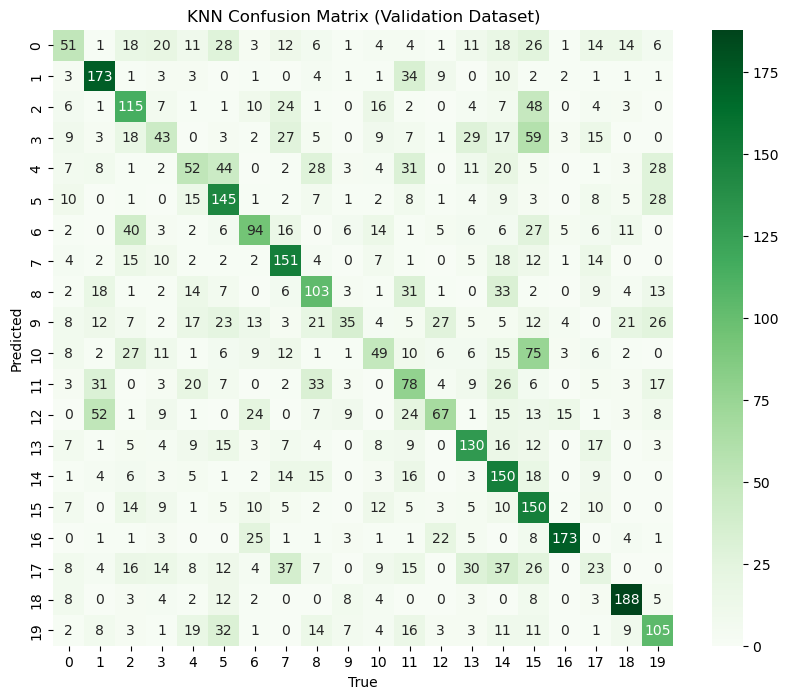

In [31]:
cf = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(10, 8))
plt.title("KNN Confusion Matrix (Validation Dataset)")
sns.heatmap(cf, annot=True, cmap="Greens", fmt='d')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.savefig('Confusion Matrix VAL Genre cityblock.png')
plt.show()

In [32]:
# Return probability estimates for the test data X.
y_val_pred_proba = clf.predict_proba(X_val_norm)

y_val_pred_proba[0:10]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.41382088, 0.        , 0.        , 0.0737532 ,
        0.        , 0.        , 0.20069069, 0.        , 0.        ,
        0.        , 0.31173523, 0.        , 0.        , 0.        ],
       [0.08863914, 0.        , 0.12118366, 0.07854181, 0.04986698,
        0.        , 0.04622892, 0.06554833, 0.        , 0.        ,
        0.        , 0.04053879, 0.03843008, 0.        , 0.19350602,
        0.11922619, 0.        , 0.12048754, 0.        , 0.03780254],
       [0.04531264, 0.        , 0.04051753, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.30444895,
        0.08255393, 0.03942041, 0.04083495, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.36374291, 0.08316868],
       [0.03793682, 0.        , 0.04654782, 0.        , 0.12866716,
        0.03700627, 0.        , 0.20736968, 0.21019544, 0.        ,
        0.        , 0.07575633, 0.        , 0

In [33]:
y_val_pred[11:21]

array(['indian', 'afrobeat', 'mandopop', 'forro', 'indian', 'study',
       'spanish', 'study', 'idm', 'black-metal'], dtype=object)

In [34]:
y_val_pred[0:10]

array(['disney', 'j-idol', 'study', 'happy', 'black-metal', 'brazil',
       'j-idol', 'iranian', 'chicago-house', 'industrial'], dtype=object)

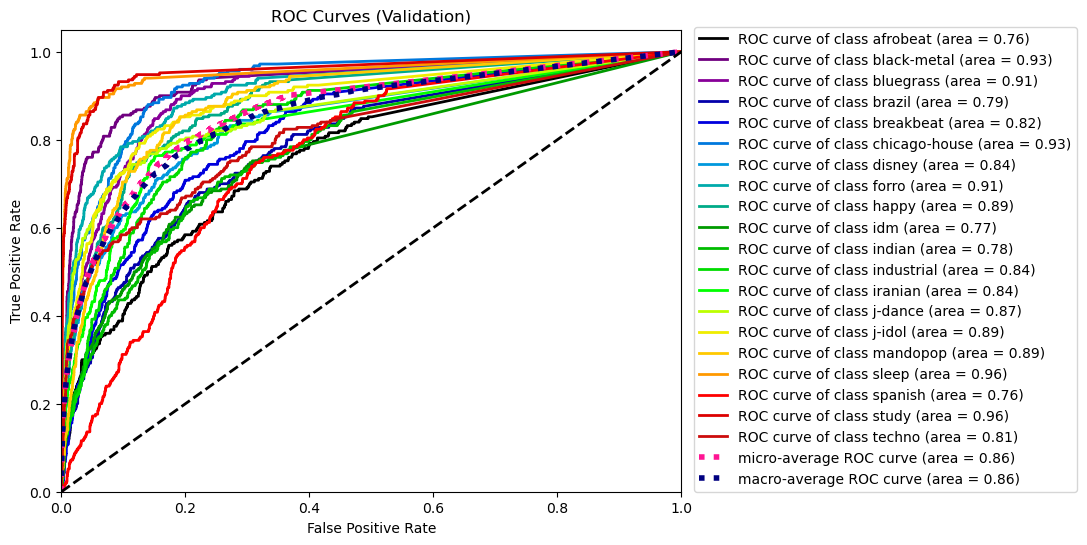

In [35]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

plot_roc(y_val, y_val_pred_proba, figsize=(8,6))
plt.title('ROC Curves (Validation)')
plt.legend(loc='lower left', bbox_to_anchor=(1.02, 0), borderaxespad=0)

plt.show()

In [36]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
roc_auc_score(y_val, y_val_pred_proba, multi_class="ovr", average="macro")

0.8576336631578949

In [37]:
roc_auc_score(y_val, y_val_pred_proba, multi_class="ovr", average="micro")

0.8648918905263157

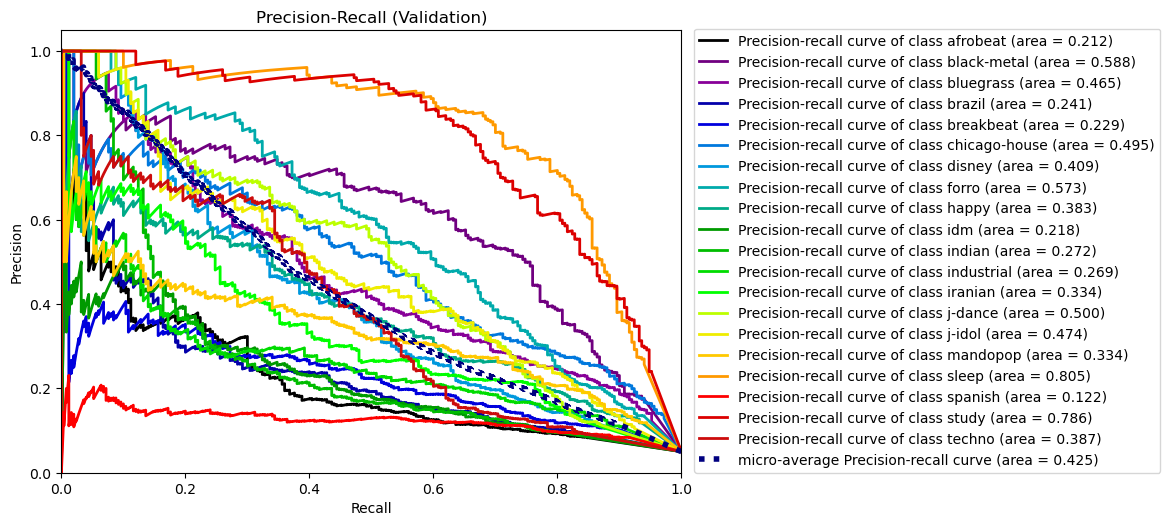

In [38]:
plot_precision_recall(y_val, y_val_pred_proba, figsize=(8,5.75))
plt.title('Precision-Recall (Validation)')
plt.legend(loc='lower left', bbox_to_anchor=(1.02, 0), borderaxespad=0)

plt.show()

#### Repeated Holdout

In [39]:
N = 50
err = 0

for i in range(N):
    # stratified holdout
    X_rh_train, X_rh_val, y_rh_train, y_rh_val = train_test_split(X, y, test_size=0.333333333333333333, stratify=y)
    
    # normalize train set
    norm.fit(X_rh_train)
    X_rh_train_norm = norm.transform(X_rh_train)
    X_rh_val_norm = norm.transform(X_rh_val)

    # initialize and fit classifier
    clf = KNeighborsClassifier(n_neighbors=24, metric="cityblock", weights="distance")
    clf.fit(X_rh_train_norm, y_rh_train)

    # computing error
    acc = clf.score(X_rh_val_norm, y_rh_val)
    err += 1 - acc

print("Overall error estimate:", err/N)

Overall error estimate: 0.58582


#### Cross-validation
https://scikit-learn.org/stable/modules/cross_validation.html

In [40]:
from sklearn.model_selection import cross_val_score
k = 10

In [41]:
# initialize classifier
clf = KNeighborsClassifier(n_neighbors=24, metric="cityblock", weights="distance")

scores = cross_val_score(clf, X_train_norm, y_train, cv=k)
scores

array([0.413, 0.439, 0.432, 0.395, 0.427, 0.392, 0.414, 0.398, 0.407,
       0.409])

In [42]:
print("Overall error estimate:", 1 - scores.mean())

Overall error estimate: 0.5874


In [43]:
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std()))

Accuracy: 0.4126 (+/- 0.02)


In [44]:
# scoring default is accuracy
cross_val_score(clf, X_train_norm, y_train, cv=k, scoring='f1_macro')

array([0.39621621, 0.42430874, 0.41586696, 0.38206999, 0.41102722,
       0.37706195, 0.39960987, 0.38714439, 0.38827625, 0.39249042])

### Hyperparameters Tuning

n_neighbors = range(1,30)
scores = list()

for n in n_neighbors:
    clf = KNeighborsClassifier(n_neighbors=n, metric="cityblock", weights="distance")
    clf.fit(X_train_norm, y_train)
    scores.append(clf.score(X_val_norm, y_val))

plt.figure(figsize=(10, 6))
plt.plot(scores)
plt.title('KNN evaluation accuracy')
plt.xticks(range(len(n_neighbors)), n_neighbors)
plt.xlabel("number of neighbors")
plt.ylabel("accuracy")
plt.savefig('Accuracy VAL 1-30.png')
plt.show()

n_neighbors = range(1,30)
avg_scores = list()
std_scores = list()

for n in n_neighbors:
    clf = KNeighborsClassifier(n_neighbors=n, metric="cityblock", weights="distance")
    scores = cross_val_score(clf, X_train_norm, y_train, cv=k)
    avg_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))

#plt.plot(avg_scores)
plt.figure(figsize=(10, 6))
plt.title('KNN evaluation accuracy with error bar')
plt.errorbar(range(len(n_neighbors)), y=avg_scores, yerr=std_scores, marker='o')
plt.xticks(range(len(n_neighbors)), n_neighbors)
plt.xlabel("number of neighbors")
plt.ylabel("accuracy")
plt.savefig('Error bar VAL 1-30.png')
plt.show()

In [45]:
clf = KNeighborsClassifier(n_neighbors=24, metric="cityblock", weights="distance")
clf.fit(X_train_norm, y_train)
y_val_pred = clf.predict(X_val_norm)
print("Accuracy:", accuracy_score(y_val, y_val_pred))

Accuracy: 0.415


#### Grid Search

In [46]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

%%time
param_grid = {
    "n_neighbors": np.arange(1, X_train.shape[0]//2),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "cityblock"],
}

grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid=param_grid,
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    refit=True,
    # verbose=2
)

grid.fit(X_train_norm, y_train)
clf = grid.best_estimator_

print(grid.best_params_, grid.best_score_)

y_val_pred = clf.predict(X_val_norm)
print("Accuracy:", accuracy_score(y_val, y_val_pred))

clf.score(X_val_norm, y_val)

### grid.cv_results_

results = pd.DataFrame(grid.cv_results_)
results

results["metric_weight"] = results["param_metric"] + ", " + results["param_weights"]

sns.lineplot(
    data=results, x="param_n_neighbors", y="mean_test_score", hue="metric_weight"
)

### Naive Bayes

In [47]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB, MultinomialNB

#### Multinomial

In [93]:
clf = MultinomialNB()

In [94]:
%%time
clf.fit(X_train_norm, y_train)

CPU times: total: 46.9 ms
Wall time: 28 ms


MultinomialNB()

In [95]:
y_pred = clf.predict(X_val_norm)
y_pred

array(['sleep', 'j-idol', 'idm', ..., 'study', 'breakbeat', 'j-idol'],
      dtype='<U13')

In [96]:
print(classification_report(y_val, y_pred))

               precision    recall  f1-score   support

     afrobeat       0.20      0.03      0.05       250
  black-metal       0.52      0.48      0.50       250
    bluegrass       0.46      0.15      0.22       250
       brazil       0.25      0.09      0.13       250
    breakbeat       0.28      0.08      0.12       250
chicago-house       0.31      0.37      0.34       250
       disney       0.28      0.10      0.15       250
        forro       0.32      0.58      0.42       250
        happy       0.24      0.12      0.16       250
          idm       0.31      0.15      0.20       250
       indian       0.07      0.02      0.03       250
   industrial       0.28      0.04      0.08       250
      iranian       0.33      0.06      0.11       250
      j-dance       0.37      0.38      0.37       250
       j-idol       0.15      0.73      0.25       250
     mandopop       0.26      0.67      0.37       250
        sleep       0.47      0.66      0.55       250
      spa

In [97]:
clf.predict_proba(X_val_norm)

array([[0.0424445 , 0.00751728, 0.04686465, ..., 0.00532594, 0.15760112,
        0.02868994],
       [0.05902385, 0.03624925, 0.05324971, ..., 0.06724809, 0.02828133,
        0.04822868],
       [0.07033472, 0.03183784, 0.04718638, ..., 0.00838866, 0.1295505 ,
        0.08109906],
       ...,
       [0.06730805, 0.02754391, 0.05968773, ..., 0.01698447, 0.10989652,
        0.0592786 ],
       [0.06231372, 0.08430121, 0.04129504, ..., 0.02662864, 0.04156544,
        0.08112781],
       [0.06259851, 0.03226683, 0.05053268, ..., 0.07421334, 0.02336239,
        0.04686372]])

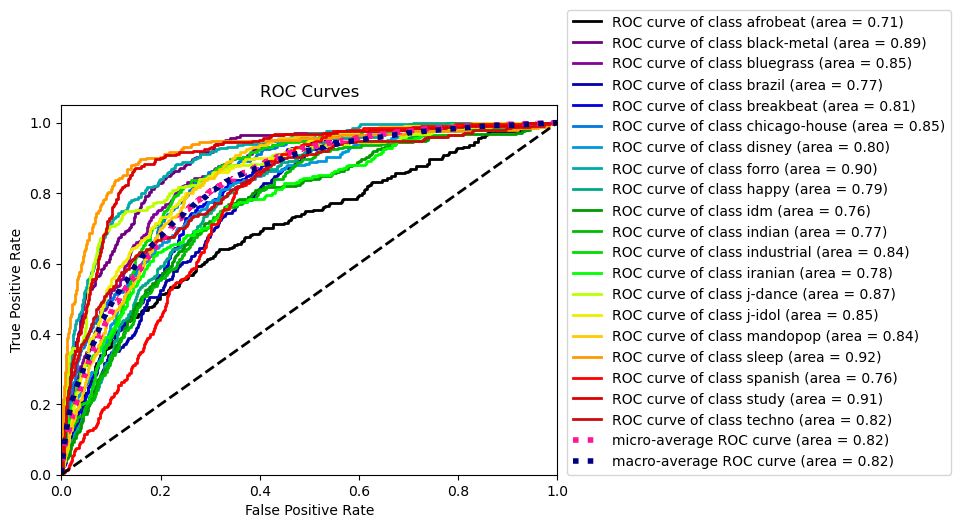

0.8242675789473684


In [98]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
plot_roc(y_val, clf.predict_proba(X_val_norm))
plt.legend(loc='lower left', bbox_to_anchor=(1.02, 0), borderaxespad=0)
plt.show()
print(roc_auc_score(y_val, clf.predict_proba(X_val_norm), multi_class="ovr", average="macro"))

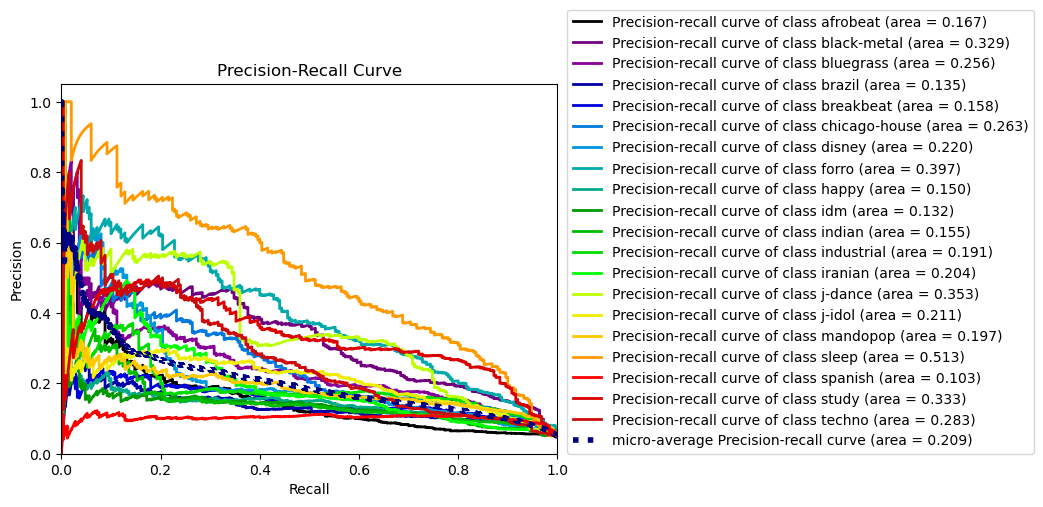

In [99]:
plot_precision_recall(y_val, clf.predict_proba(X_val_norm))
plt.legend(loc='lower left', bbox_to_anchor=(1.02, 0), borderaxespad=0)

plt.show()

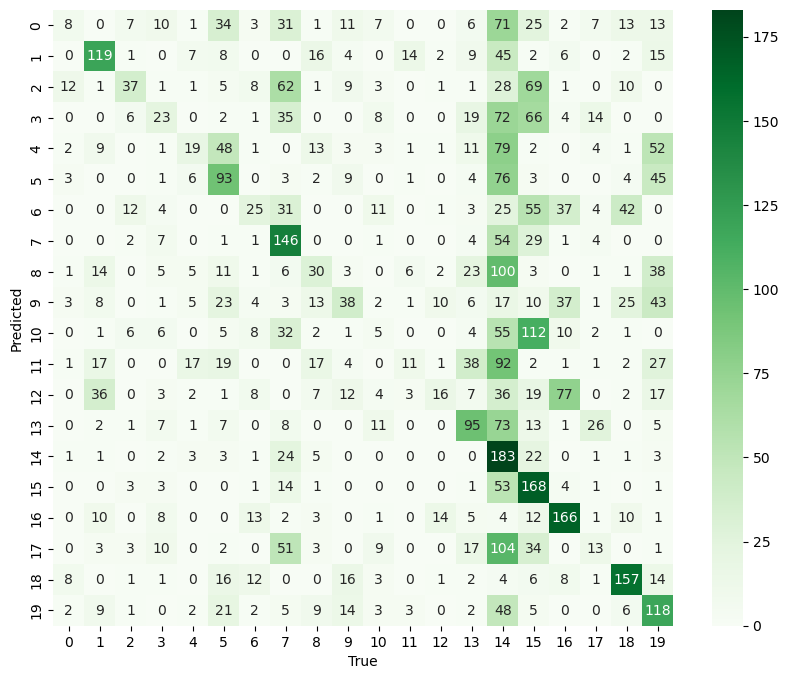

In [100]:
cf = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cf, annot=True, cmap="Greens", fmt='d')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()